In [15]:
###Use environment dragonn

import sys
sys.path.insert(0,'/srv/scratch/manyu/software/modisco_private/modisco/visualization/')

In [2]:
import viz_sequence

In [3]:
import numpy as np

In [4]:
data_guided_backprop_scores=np.load('/srv/scratch/manyu/NIPS_workshop_tests/train_models/deeplift/CEBPB/deeplifted_models/seq_meth/deeplift_tracks_/genome_data_dir.npy')

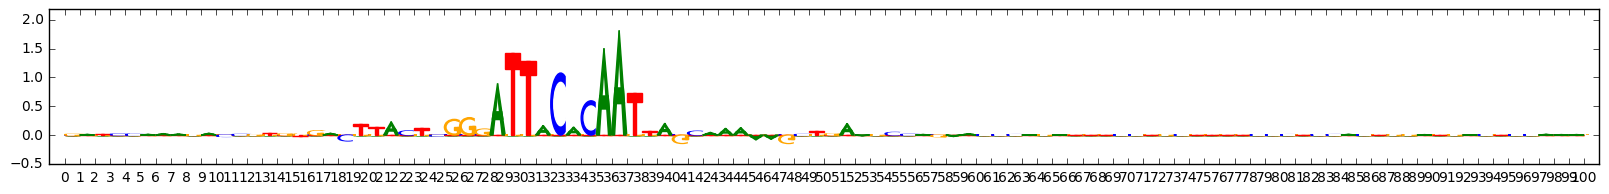

In [5]:
viz_sequence.plot_weights(array=data_guided_backprop_scores[0,:,550:650])

In [6]:
import tensorflow as tf
import keras 
import keras.backend as K
import os

Using TensorFlow backend.


In [7]:
DEFER_DELETE_SIZE=int(250 * 1e6)
def create_tensorflow_session(visiblegpus):
    os.environ['CUDA_VISIBLE_DEVICES'] = str(visiblegpus)
    session_config = tf.ConfigProto()
    session_config.gpu_options.deferred_deletion_bytes = DEFER_DELETE_SIZE
    session_config.gpu_options.per_process_gpu_memory_fraction = 0.45
    session = tf.Session(config=session_config)
    K.set_session(session)
    return session



In [8]:
sess=create_tensorflow_session(0)

In [9]:
sys.path.insert(0,'/users/manyu/tf-dragonn/tfdragonn/gf_keras/')

In [10]:
from models import *
from keras.models import model_from_config

In [11]:
path_to_model_config='/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_meth_CEBPB_ENCSR000EHE/model.arch.json'
path_to_model_spec='/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_meth_CEBPB_ENCSR000EHE/modelspec.json'

In [12]:
seq_meth_model_CEBPB=model_from_minimal_config(model_config_file_path=path_to_model_spec,num_tasks=1,shapes={'data/genome_data_dir':(4,1000),'data/methylation_data_dir':(1000,)})

In [17]:
seq_meth_model_CEBPB.model.load_weights('/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_meth_CEBPB_ENCSR000EHE/model.weights.h5')
keras_model_CEBPB=seq_meth_model_CEBPB.model

In [32]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

In [78]:

#SVG(model_to_dot(keras_model_CEBPB).create(prog='dot', format='svg'))
conv_lowest_layer=keras_model_CEBPB.get_layer('convolution1d_1').get_weights()

In [79]:
filters=conv_lowest_layer[0]
biases=conv_lowest_layer[1]
filters=filters+biases

In [80]:
filters=filters.squeeze().transpose(2,1,0)


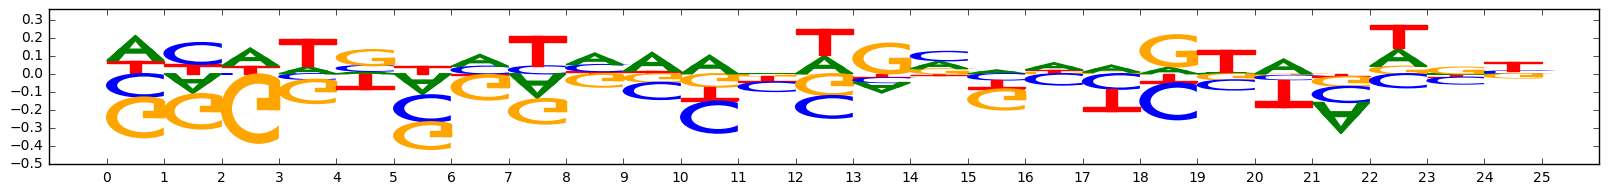

In [88]:
viz_sequence.plot_weights(filters[0][0:4,:])

In [92]:
# SVG(model_to_dot(keras_model_CEBPB).create(prog='dot', format='svg'))

In [93]:
path_to_seq_only_model_config='/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_only_CEBPB_ENCSR000EHE/modelspec.json'
path_to_seq_only_weights='/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_only_CEBPB_ENCSR000EHE/model.weights.h5'

In [101]:
model_seq_only_CEBPB=model_from_minimal_config(path_to_seq_only_model_config,num_tasks=1,shapes={'data/genome_data_dir':(4,1000)})      
                                                                                                

In [106]:
from keras.models import model_from_json


In [107]:
path_to_json='/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_only_CEBPB_ENCSR000EHE/model.arch.json'
with open(path_to_json,'r') as f:
    model_seq_only=model_from_json(f.read())

In [109]:
model_seq_only.load_weights('/srv/scratch/manyu/NIPS_workshop_tests/train_models/logdir_seq_only_CEBPB_ENCSR000EHE/model.weights.h5')

In [115]:
#
conv_lowest_layers_seq=model_seq_only.get_layer('convolution1d_1')
conv_lowest_layer_seq_weights=conv_lowest_layers_seq.get_weights()

In [129]:
filters_seq_model=conv_lowest_layer_seq_weights[0]
biases_seq_model=conv_lowest_layer_seq_weights[1]
filters_seq_model=biases_seq_model+filters_seq_model

In [132]:
filters_seq_model=filters_seq_model.squeeze().transpose(0,2,1)

In [139]:
filters_seq_model.shape

(15, 15, 4)

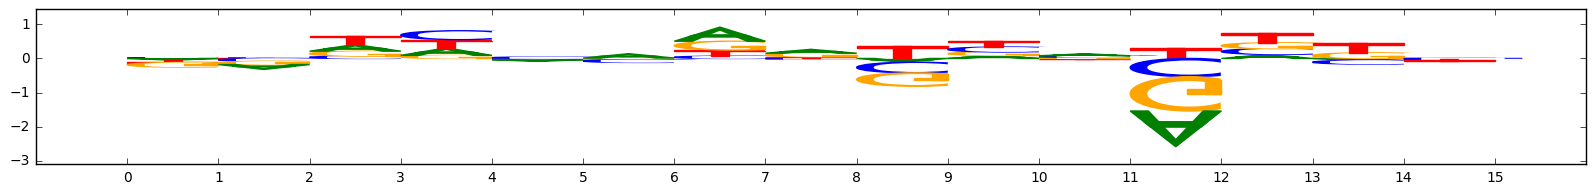

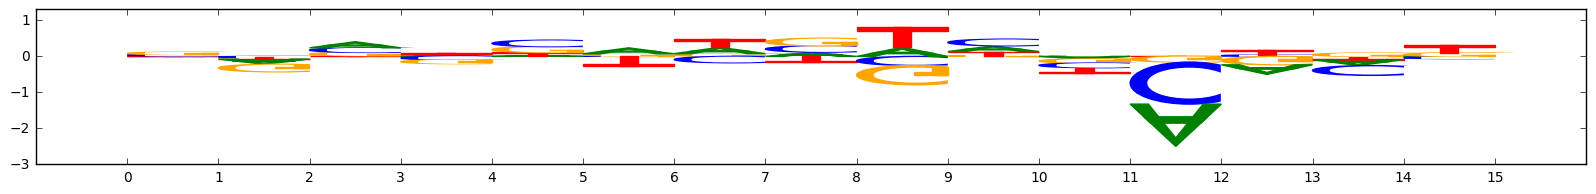

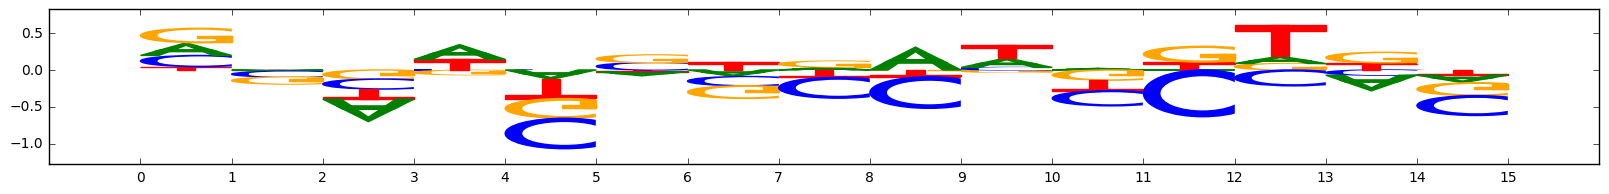

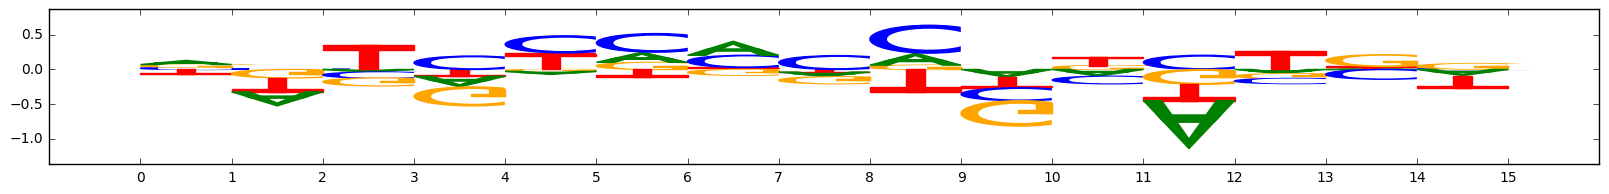

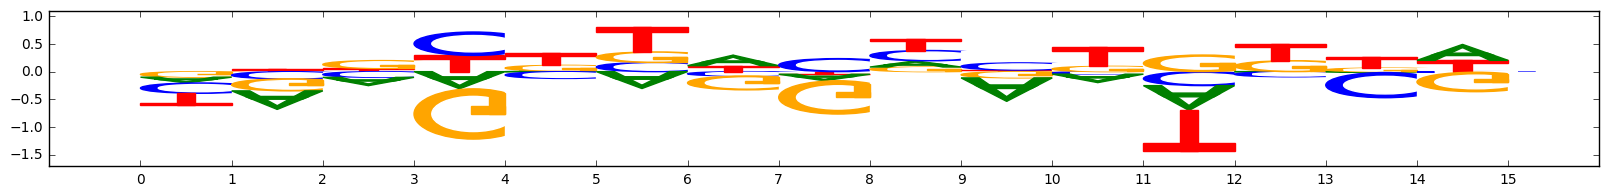

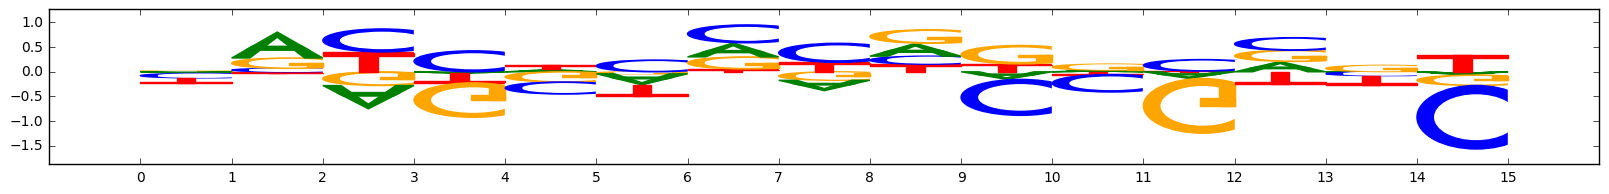

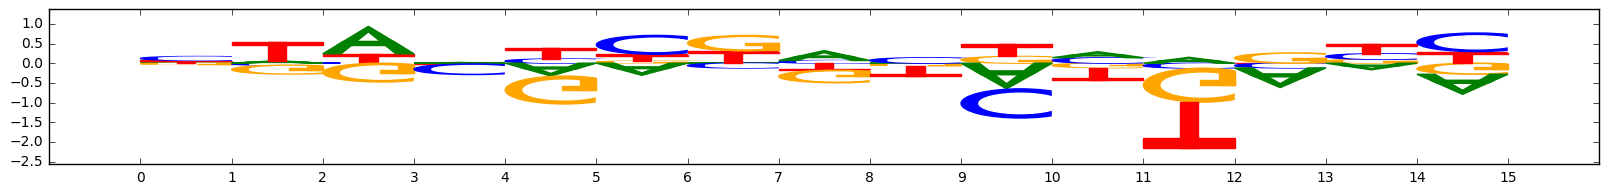

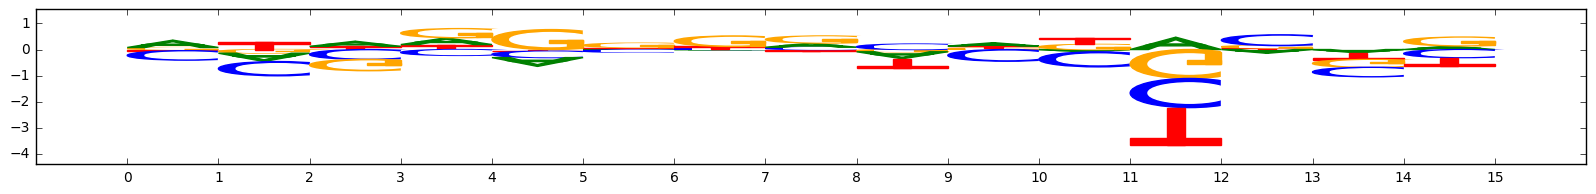

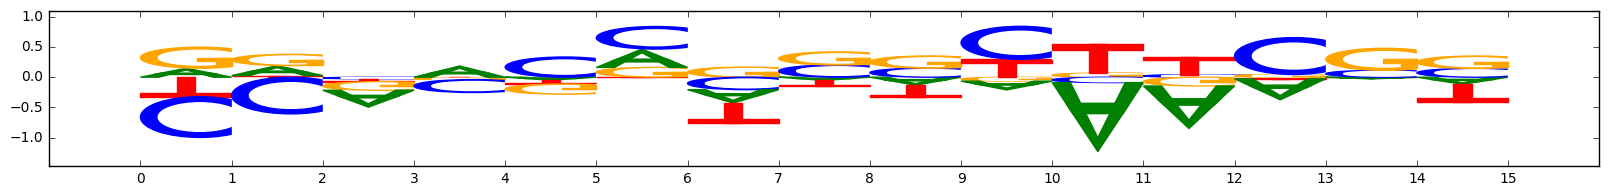

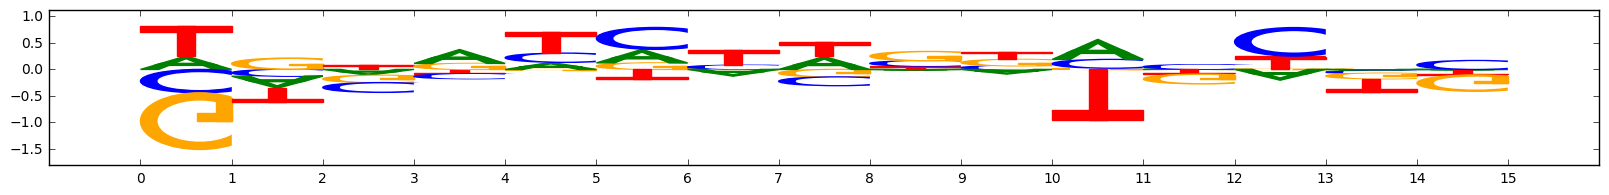

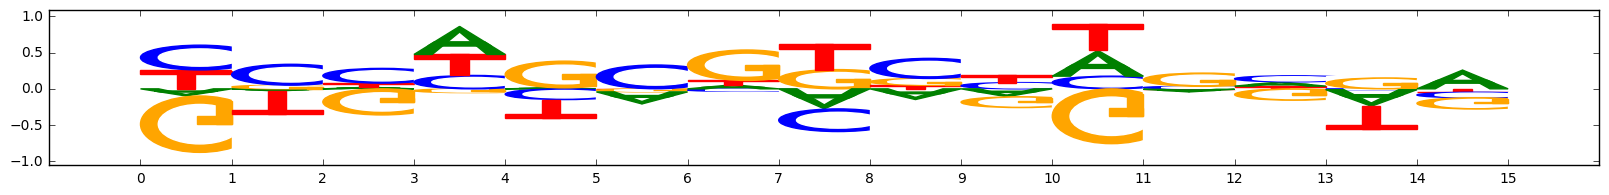

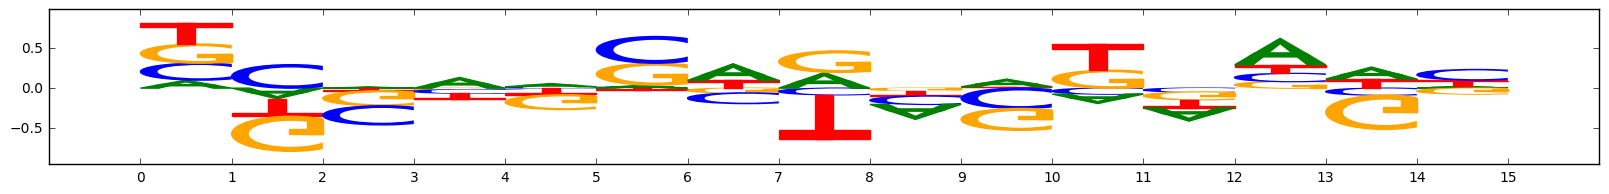

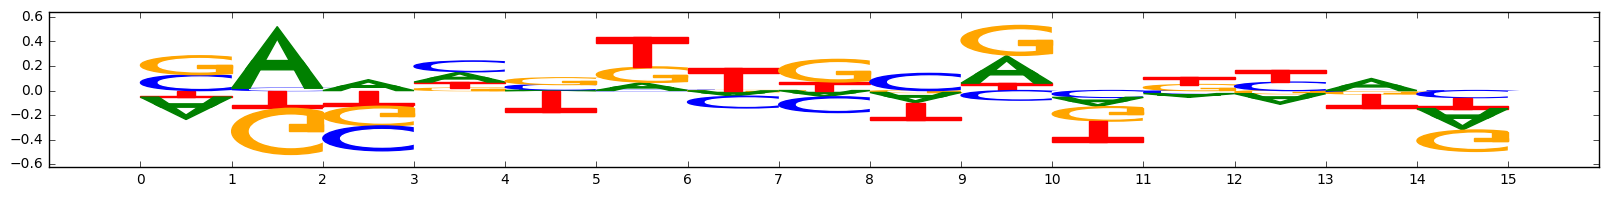

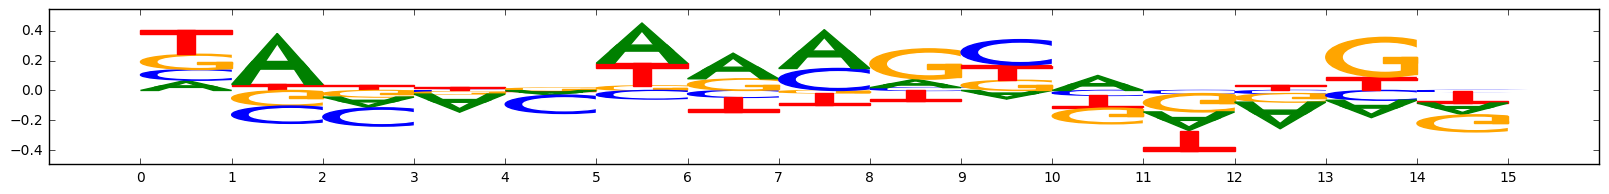

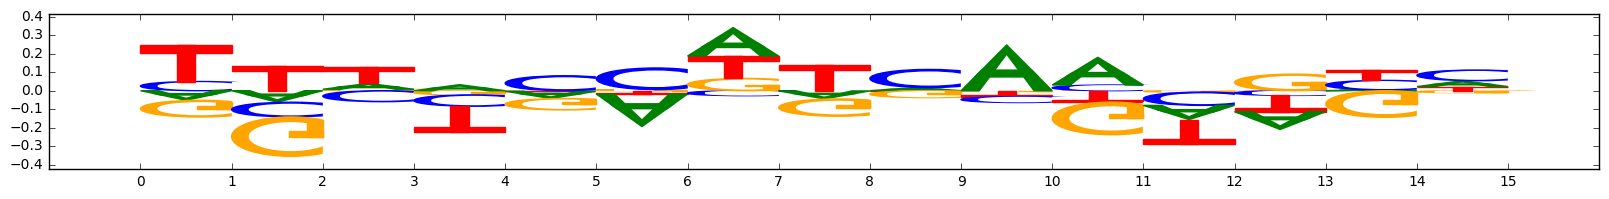

In [140]:
for filter_ in filters_seq_model:
    viz_sequence.plot_weights(filter_)